In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [17]:
tiktok_data=pd.read_excel('Data cleaning/filtered_data.xlsx')
tiktok_data.head(3)

,authorMeta/fans,authorMeta/heart,authorMeta/name,authorMeta/signature,authorMeta/verified,authorMeta/video,commentCount,diggCount,downloaded,hashtags/0/name,...,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration,videoMeta/height,videoMeta/width,mention,bio
0,13200000,150400000,miso_ara,soonent@soon-ent.co.kr\n.\n Miso Ara IG,True,303,66000,19300000,False,woah,...,200600000,meme,556B,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17,1280,720,0,1
1,1300000,35100000,crinka11,insta: chrisrinker73,False,518,154100,15400000,False,fyp,...,79600000,meme,556B,205400,#fyp #meme #funny #meme #vine,11,1024,576,0,1
2,696800,15900000,iampets_com,"Pet supplies, toys online store. All products ...",False,90,55300,13900000,False,funny,...,106100000,meme,556B,323000,The end #funny #funnyvideos #animals #haha #me...,25,1024,576,0,1


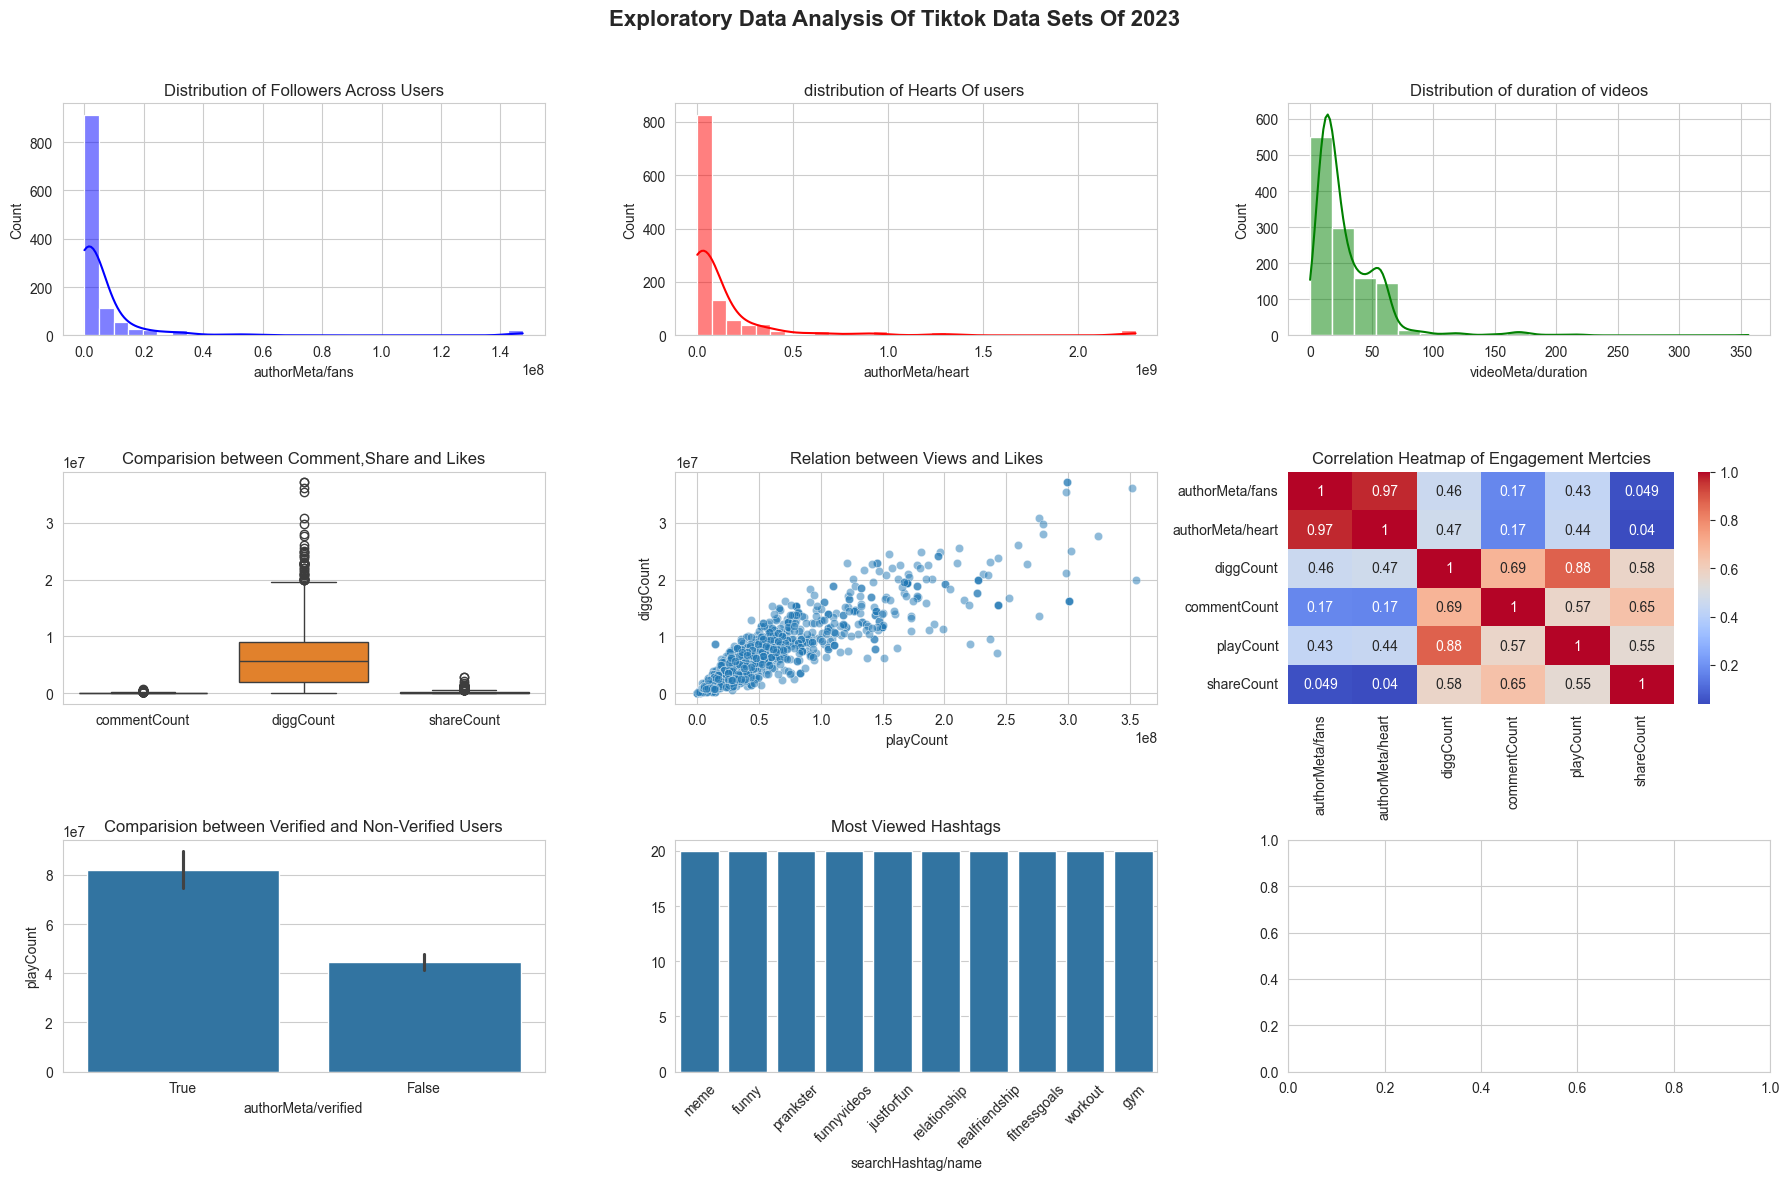

In [25]:
sns.set_style("whitegrid")
fig, axes= plt.subplots(3,3,figsize=(18,12))
fig.suptitle("Exploratory Data Analysis Of Tiktok Data Sets Of 2023", fontsize=16, fontweight ='bold')

#Distrubition of Followers Of Users
sns.histplot(tiktok_data["authorMeta/fans"],bins=30,kde= True, ax=axes[0,0],color='blue')
axes[0,0].set_title('Distribution of Followers Across Users')

#distribution of total hearts recieved by Users
sns.histplot(tiktok_data['authorMeta/heart'],bins=30 , kde=True , ax=axes[0,1],color='red')
axes[0,1].set_title('distribution of Hearts Of users ')

# Distribution of video duration in tiktok
sns.histplot(tiktok_data['videoMeta/duration'],bins= 20, kde=True, ax=axes[0,2], color='green')
axes[0,2].set_title('Distribution of duration of videos')

# Boxplot between comments, likes ,shares
sns.boxplot(data=tiktok_data[['commentCount','diggCount','shareCount']],ax=axes[1,0])
axes[1,0].set_title('Comparision between Comment,Share and Likes')

#Scatter plot (views vs likes)
sns.scatterplot(x=tiktok_data['playCount'],y=tiktok_data['diggCount'],ax=axes[1,1],alpha=0.5)
axes[1,1].set_title('Relation between Views and Likes')

# Heatmap of engagement metrices
sns.heatmap(tiktok_data[['authorMeta/fans', 'authorMeta/heart', 'diggCount' , 'commentCount', 'playCount', 'shareCount' ]].corr(),
            annot=True, cmap='coolwarm', ax=axes[1,2])
axes[1,2].set_title('Correlation Heatmap of Engagement Mertcies')

#Barchart comparision between verified and unverified users
sns.barplot(x=tiktok_data['authorMeta/verified'].astype(str),y=tiktok_data['playCount'],ax=axes[2,0])
axes[2,0].set_title('Comparision between Verified and Non-Verified Users')

#Most popular Hashtags
top_hashtags= tiktok_data['searchHashtag/name'].value_counts().head(10) # head(10) selects top 10 hashtags
sns.barplot(x=top_hashtags.index , y=top_hashtags.values, ax=axes[2,1])
axes[2,1].set_title('Most Viewed Hashtags')
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(),rotation=45)

#Adjusting Layout
plt.tight_layout(rect=[0,0,1,0.96])

plt.show()



<Axes: >

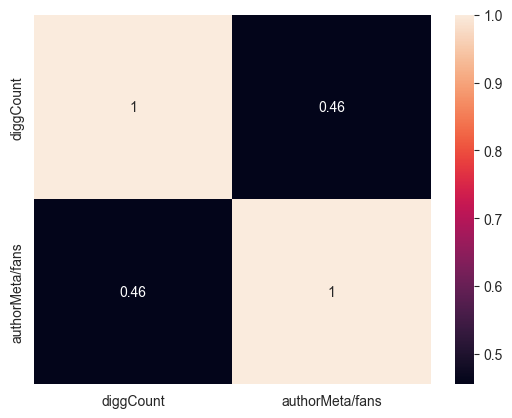

In [19]:
correlation=tiktok_data[['diggCount', 'authorMeta/fans']].corr(numeric_only=True)
sns.heatmap(correlation,annot=True)

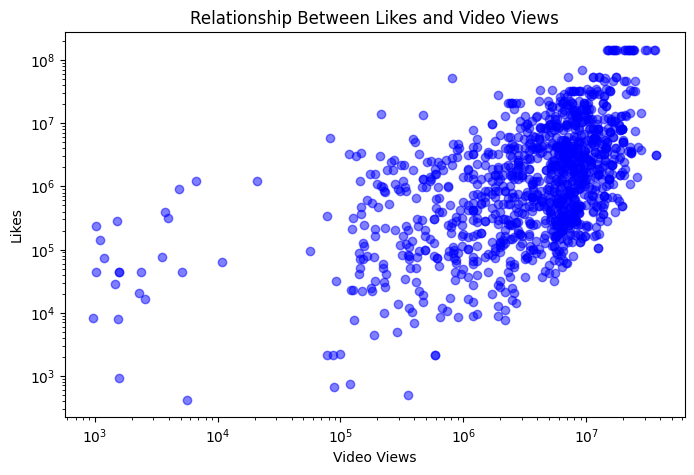

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(tiktok_data['diggCount'], tiktok_data['authorMeta/fans'], color='blue', alpha=0.5)
plt.xlabel('Video Views')
plt.ylabel('Likes')
plt.title('Relationship Between Likes and Video Views')
plt.xscale('log')  # Log scale to spread out smaller values
plt.yscale('log')
plt.show()

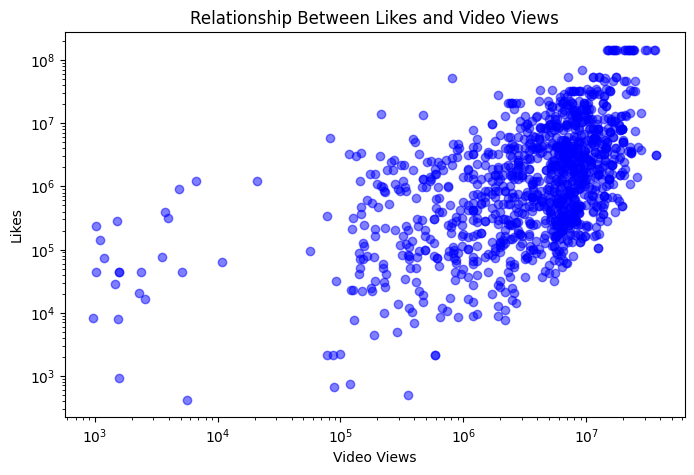

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(tiktok_data['diggCount'], tiktok_data['authorMeta/fans'], color='blue', alpha=0.5)
plt.xlabel('Video Views')
plt.ylabel('Likes')
plt.title('Relationship Between Likes and Video Views')
plt.xscale('log')  # Log scale to spread out smaller values
plt.yscale('log')
plt.show()

EDa